#  WGU MSDA D212 Data Mining II Task 2 - Dimensionaity Reduction Methods

## Jan Francis Mitchell Barlaan

### A1: Proposal of Question
* Using, PCA, can we reduce the data set dimensionality to just the essential features and reduce noise, while still keeping variability? In the context of a telecommunications company such as ours, which features are relevant in modeling customer churn trends? 

### A2: Defined Goal
* Our goal with PCA is to identify which data set features are relevant to retain and use to create a model in customer churn analysis. Identifying only the relevant features is very helpful when choosing specific services targets, packages, and metrics to fine tune accordingly to customer churn trends. Ultimately, this efficiency and service fine-tuning will translate to better customer experience and satisfaction, reducing churn. 

### B1: Explanation of PCA
* PCA works on data sets with multiple points or features such as our customer information
* PCA begins by making the average of each feature zero
* Next, it searches for the features that capture the most variation in the data, the Principal Components (PCs)
* These features are then bundled into the PCs. The first PC will describe the most variation, and every following PC after the first will decrease in feature variance
* PCA assists in retaining only the most relevant PCs, reducing noise and dimensionality. PCA is also able to reconstruct the data from the resulting PCs (Vadapalli, PCA in Machine Learning: Assumptions, steps to apply &amp; applications 2024).

### B2: PCA Assumption
* One assumption of PCA is that linearity exists in the data set through the variables exhibiting relationships amongst themselves (Principal component analysis(pca) 2025).


### C1: Continuous Data Set Variables
* The variables listed below will be used in this task.


| Variable    | Categorical/Continuous 
| :--------: | :-------: 
| Tenure  | Continuous 
| Bandwidth_GB_Year | Continuous 
| MonthlyCharge | Continuous 
| Outage_sec_perweek | Continuous 
| Income | Continuous 
| Population | Continuous



 

### C2: Standardization of Data Set Variables 

* My data preprocessing goals involves most of the same basic data cleaning steps that I have performed in previous tasks, which include detecting duplicates, nulls, and outliers and addressing them if present. Outliers will be detected for with boxplots. I will also create a new dataframe with only the columns that I have deemed relevant for the Principal Component Analysis. PCA is sensitive to outliers and assumes that they have been addressed. Therefore, I will apply RobustScaler to the new dataframe if outliers are detected in the selected features. The following code is what I used to accomplish these data cleaning goals.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

#Load CSV

# The first column is an index. We will duplicate this and create a column without it
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D212\Task 2\Churn Clean/churn_clean.csv', index_col=0)

In [2]:
#Check for duplicates

df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [3]:
#Show number of duplicates. False = no duplicates 

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [4]:
#Count of null/missing values in each column

df.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

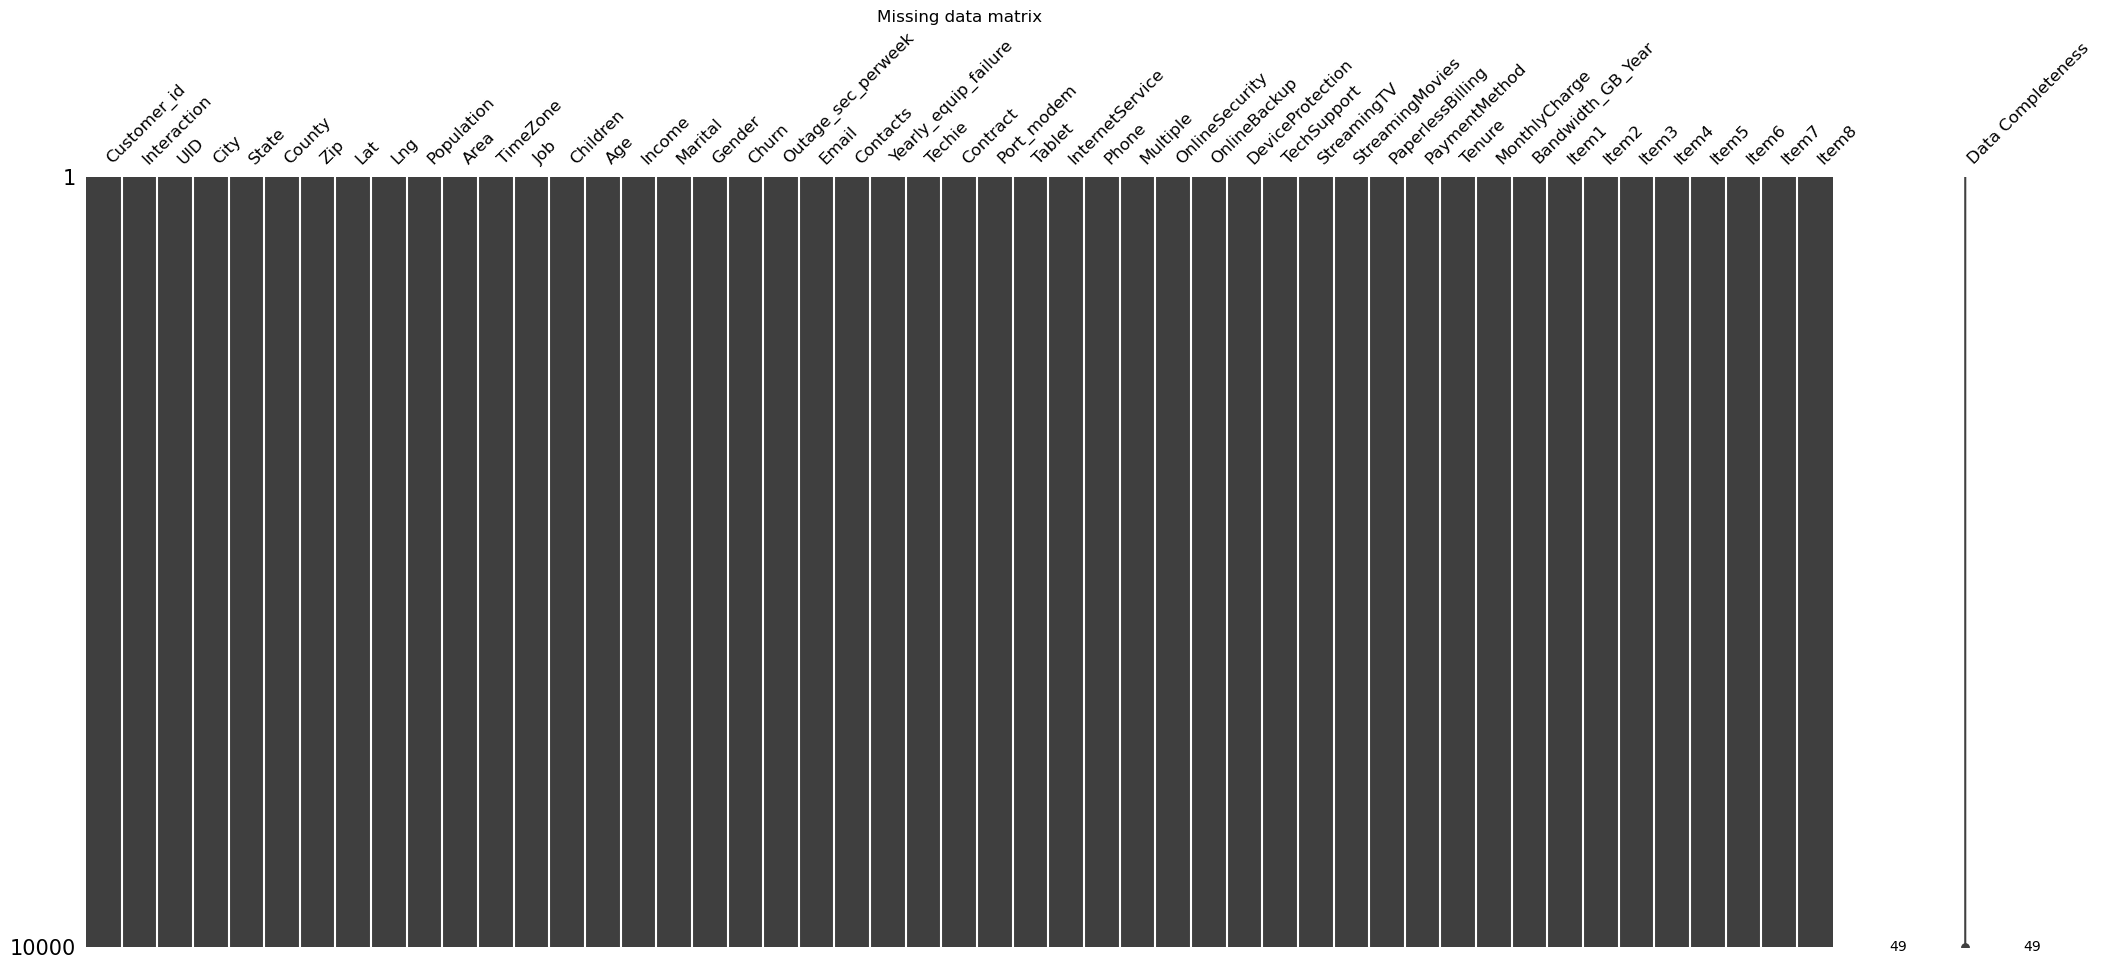

In [5]:
#Import missingno to visualize missing/null values 

import missingno as msno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()


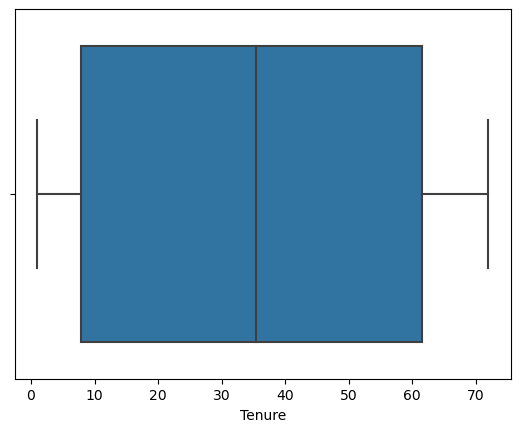

In [6]:
#Outlier check with boxplot on 'Tenure'

boxplot=sns.boxplot(x='Tenure',data=df)

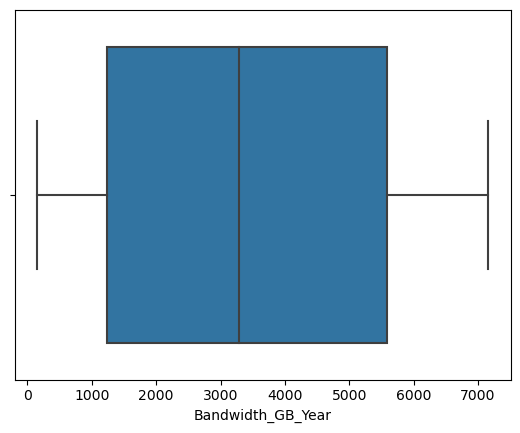

In [7]:
#Outlier check with boxplot on numerical continuous independent variable 'Bandwidth_GB_Year'

boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=df)

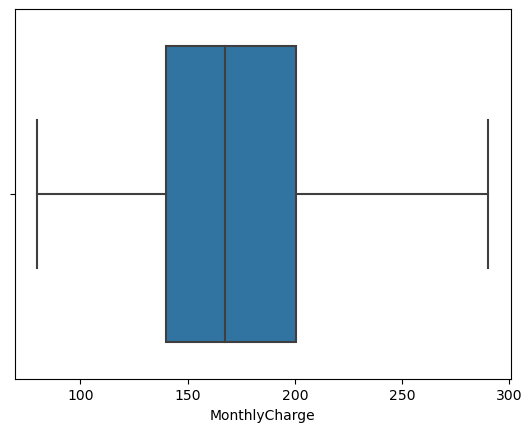

In [8]:
#Outlier check with boxplot on 'MonthlyCharge'

boxplot=sns.boxplot(x='MonthlyCharge',data=df)

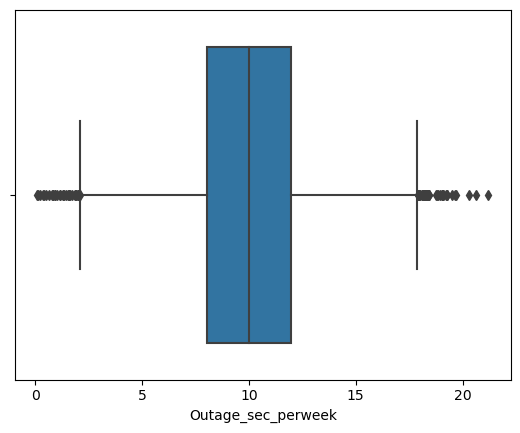

In [9]:
#Outlier check with boxplot on numerical continuous independent variable 'Outage_sec_perweek'

boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)

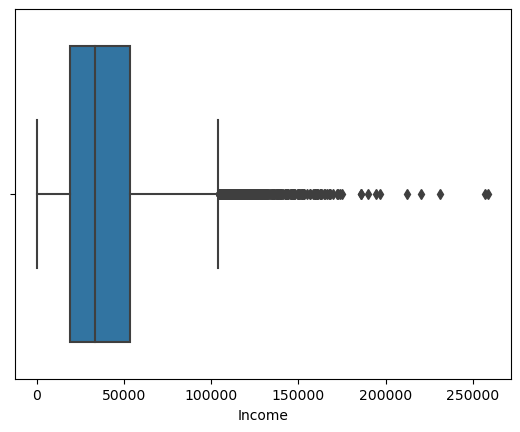

In [10]:
#Outlier check with boxplot on 'Income'

boxplot=sns.boxplot(x='Income',data=df)

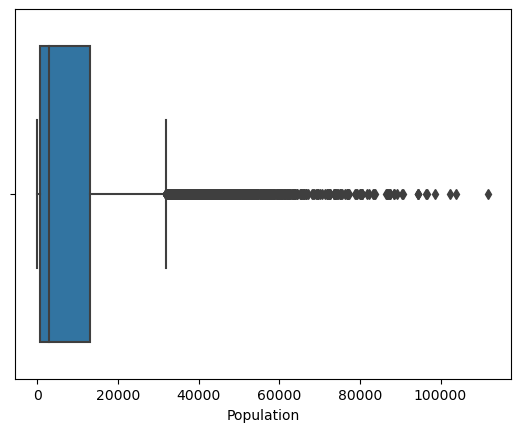

In [11]:
#Outlier check with boxplot on 'Population'

boxplot=sns.boxplot(x='Population',data=df)

In [12]:
#Create new dataframe containing only the relevant columns for this analysis

PCA_df = df[['Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Outage_sec_perweek', 'Income', 'Population']]

PCA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tenure              10000 non-null  float64
 1   Bandwidth_GB_Year   10000 non-null  float64
 2   MonthlyCharge       10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Income              10000 non-null  float64
 5   Population          10000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 546.9 KB


In [13]:
PCA_df.head()

,Tenure,Bandwidth_GB_Year,MonthlyCharge,Outage_sec_perweek,Income,Population
CaseOrder,,,,,,
1,6.795513,904.536110,172.455519,7.978323,28561.99,38
2,1.156681,800.982766,242.632554,11.699080,21704.77,10446
3,15.754144,2054.706961,159.947583,10.752800,9609.57,3735
4,17.087227,2164.579412,119.956840,14.913540,18925.23,13863
5,1.670972,271.493436,149.948316,8.147417,40074.19,11352


In [14]:
PCA_df.describe()

,Tenure,Bandwidth_GB_Year,MonthlyCharge,Outage_sec_perweek,Income,Population
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.526188,3392.341550,172.624816,10.001848,39806.926771,9756.562400
std,26.443063,2185.294852,42.943094,2.976019,28199.916702,14432.698671
min,1.000259,155.506715,79.978860,0.099747,348.670000,0.000000
25%,7.917694,1236.470827,139.979239,8.018214,19224.717500,738.000000
50%,35.430507,3279.536903,167.484700,10.018560,33170.605000,2910.500000
75%,61.479795,5586.141370,200.734725,11.969485,53246.170000,13168.000000
max,71.999280,7158.981530,290.160419,21.207230,258900.700000,111850.000000


In [15]:
#Save prepared PCA dataframe to CSV

PCA_df.to_csv('PCA_df.csv', index=False)

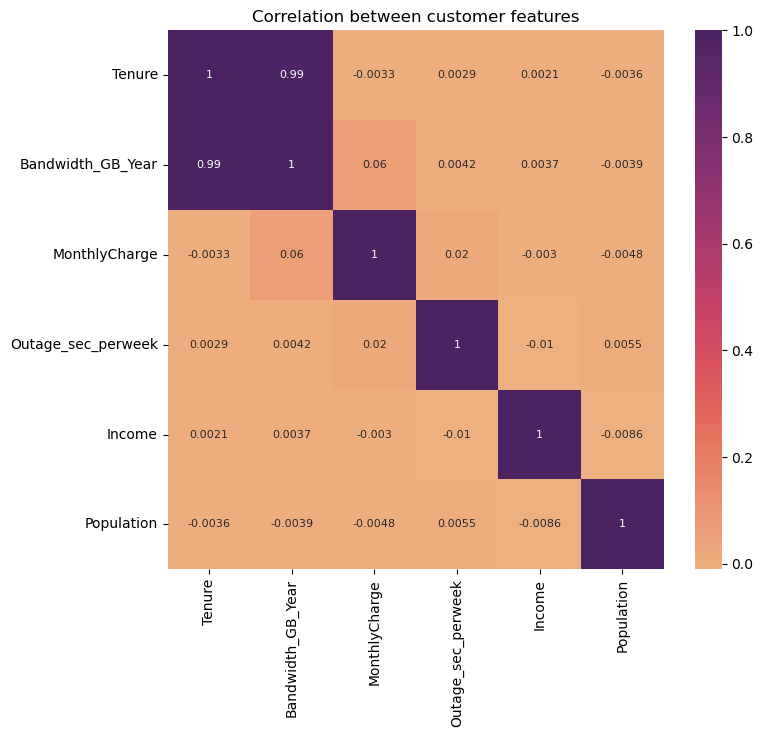

In [16]:
#Exploration of relation between customer features

plt.figure(figsize=(8,7))
sns.heatmap(PCA_df.corr(), annot=True, annot_kws={"fontsize":8}, cmap="flare")
plt.title("Correlation between customer features")
plt.show()

In [17]:
#Using RobustScaler to scale features and handle outliers prior to PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = PCA_df

scaled_data = scaler.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data, columns=PCA_df.columns)

RobustScaled_PCA_df = scaled_data

RobustScaled_PCA_df.head()

,Tenure,Bandwidth_GB_Year,MonthlyCharge,Outage_sec_perweek,Income,Population
0,-0.534613,-0.546019,0.081817,-0.516350,-0.135462,-0.231094
1,-0.639889,-0.569826,1.236890,0.425311,-0.337018,0.606235
2,-0.367356,-0.281591,-0.124057,0.185824,-0.692535,0.066331
3,-0.342468,-0.256331,-0.782281,1.238837,-0.418717,0.881134
4,-0.630288,-0.691557,-0.288639,-0.473555,0.202919,0.679123


In [18]:
#Save prepared RobustScaled Cluster dataframe to CSV

RobustScaled_PCA_df.to_csv('RobustScaled_PCA_df.csv', index=False)

### D1: Principal Components
* The matrix for all the principal components is displayed in the cells below, along with the covariance matrix and loadings matrix.


 

In [19]:
#Create the covariance matrix
cov_matrix = np.dot(RobustScaled_PCA_df.T, RobustScaled_PCA_df) / df.shape[0]
cov_matrix

array([[ 2.43990291e-01,  2.45460146e-01, -2.59266554e-03,
         1.16151149e-03, -2.42821597e-03, -1.13391266e-02],
       [ 2.45460146e-01,  2.53057801e-01,  2.36428223e-02,
         1.47022982e-03,  6.58841991e-03,  1.20077810e-02],
       [-2.59266554e-03,  2.36428223e-02,  5.06699984e-01,
         1.05524034e-02,  1.47373453e-02,  4.26757795e-02],
       [ 1.16151149e-03,  1.47022982e-03,  1.05524034e-02,
         5.67241615e-01, -7.07398210e-03,  2.46534427e-03],
       [-2.42821597e-03,  6.58841991e-03,  1.47373453e-02,
        -7.07398210e-03,  7.25033352e-01,  9.91213813e-02],
       [-1.13391266e-02,  1.20077810e-02,  4.26757795e-02,
         2.46534427e-03,  9.91213813e-02,  1.65140737e+00]])

* Displayed below is the covariance matrix

In [20]:
# Store the covariance matrix (cov_matrix) as a dataframe and display it
cov_matrix_df = pd.DataFrame(cov_matrix, columns = ['Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Outage_sec_perweek', 'Income', 'Population'])
cov_matrix_df

,Tenure,Bandwidth_GB_Year,MonthlyCharge,Outage_sec_perweek,Income,Population
0,0.243990,0.245460,-0.002593,0.001162,-0.002428,-0.011339
1,0.245460,0.253058,0.023643,0.001470,0.006588,0.012008
2,-0.002593,0.023643,0.506700,0.010552,0.014737,0.042676
3,0.001162,0.001470,0.010552,0.567242,-0.007074,0.002465
4,-0.002428,0.006588,0.014737,-0.007074,0.725033,0.099121
5,-0.011339,0.012008,0.042676,0.002465,0.099121,1.651407


In [21]:
#Save prepared covariance matrix dataframe to CSV

cov_matrix_df.to_csv('cov_matrix_df.csv', index=False)

* Listed below is specifically the matrix for all the principal components

In [22]:
# Create new variable, pca, and transform it into a dataframe

from sklearn.decomposition import PCA

pca = PCA(n_components=RobustScaled_PCA_df.shape[1])

pca.fit(RobustScaled_PCA_df)

df_pca = pd.DataFrame(pca.transform(RobustScaled_PCA_df),
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.777916,-0.318715,-0.563211,-0.420131,0.613626,0.031931
1,0.062701,-0.573192,0.535742,0.234127,1.366419,0.010271
2,-0.469349,-0.903212,0.079694,-0.485795,0.198580,-0.041331
3,0.351280,-0.666314,1.017631,-1.122601,-0.318141,-0.062116
4,0.130515,0.031898,-0.579208,-0.809626,0.505170,0.054265


* Below is specifically the loadings matrix

In [23]:
# Create the PCA loadings matrix:
# PCs are groupings that have some sort of relationship
# The closer the loading is to 1 or -1 indicates that the variable is significantly associated with the PC
# When assessing which variable is associated with the PC always take the absolute value of the loadings 
# How to get the loading matrix
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6'],
                        index=RobustScaled_PCA_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Tenure,-0.002453,0.004754,0.037256,0.436252,-0.548544,0.712297
Bandwidth_GB_Year,-0.002725,0.005344,0.045471,0.477043,-0.527930,-0.701154
MonthlyCharge,-0.004580,-0.012130,0.167079,0.744869,0.645035,0.031871
Outage_sec_perweek,0.006167,-0.052461,0.982735,-0.164984,-0.064974,-0.000021
Income,-0.012626,0.998440,0.053302,-0.004337,0.009851,0.000748
Population,0.999884,0.012902,-0.004407,0.006745,0.000695,-0.000008


### D2: Identification of the Total Number of Components

In [24]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.37472524, 0.19101096, 0.15810125, 0.14179245, 0.13392461,
       0.00044548])

In [25]:
# To print the number of PCs on an axis starting at 1 instead of defaulting to start at 0, the array 'pcomp' is created for plotting:
pcomp = np.arange(pca.n_components_)+1
pcomp

array([1, 2, 3, 4, 5, 6])

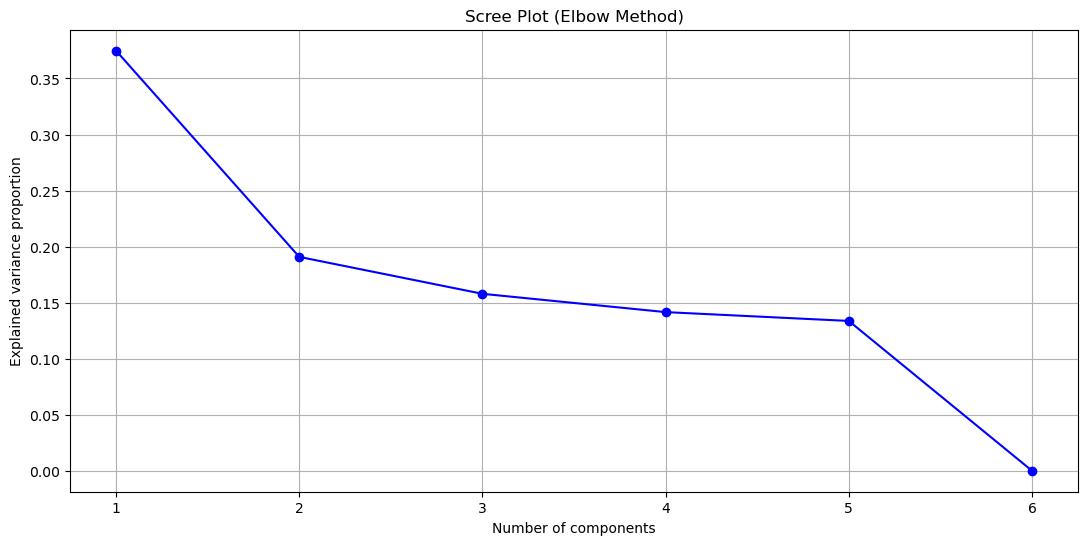

In [26]:
# Construct the Scree plot. We are using the Elbow Method to determine our PCs

plt.figure(figsize=(13,6))
plt.plot(pcomp, exp_var, 'b-', marker='o')
plt.title('Scree Plot (Elbow Method)')
plt.xlabel('Number of components')
plt.ylabel('Explained variance proportion')
plt.grid()
plt.show()

* Based on the Elbow Method, I have determined that 3 is the total number of Principal Components using the Elbow Method on the Scree Plot. 

### D3: Variance of Each Component

In [27]:
print("Explained variance of PC1:",exp_var[0].round(4))
print("Explained variance of PC2:",exp_var[1].round(4))
print("Explained variance of PC3:",exp_var[2].round(4))
print("Explained variance of PC4:",exp_var[3].round(4))
print("Explained variance of PC5:",exp_var[4].round(4))
print("Explained variance of PC6:",exp_var[5].round(4))

Explained variance of PC1: 0.3747
Explained variance of PC2: 0.191
Explained variance of PC3: 0.1581
Explained variance of PC4: 0.1418
Explained variance of PC5: 0.1339
Explained variance of PC6: 0.0004


* As previously mentioned, we have determined that there are 3 Principal Components by using the Elbow Method on the Scree Plot. This is further supported by the fact that we can also see through quantitative methods that the variance between PCs start to decrease between PC3 and PC4. 

### D4: Total Variance Captured by Components
* The total variance captured by our identified Principal Components using the Elbow Method (PC1 - PC3) is a follows:

In [28]:
print("Total variance of principal components:",exp_var[0:3].sum().round(4))

Total variance of principal components: 0.7238


### D5: Summary of Data Analysis
* The question and goal of this analysis was to see if we could reduce dimensionality and noise while preserving variability and retaining the most relevant features. The answer to that question is that yes, it is possible to do so as evidenced by the 3 Principal Components we have identified at the end of our analysis. Using this method (Elbow Method) with PCA, our model with 3 Principal Components explains about 72.4% of the variance in our data. The Kaiser method with eigenvalues was another way to determine our total PCs, however, that method tends to be stricter and the tradeoff is retaining fewer components, leading to lower variance. Regardless, either method falls upon the subjectivity of the analyst to determine where the variances between Principal Components begin to decrease and which PCs to ultimately retain.

### E: Sources for Third-Party Code
* [Kesselly Kamara]. PCA With Data Mining II - D212 [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a7592d75-cc72-47fd-8a9a-b07a00efff97

### F: Sources
* Principal component analysis(pca). GeeksforGeeks. (2025, February 3). https://www.geeksforgeeks.org/principal-component-analysis-pca/ 
* Vadapalli, P. (2024, February 15). PCA in Machine Learning: Assumptions, steps to apply & applications. upGrad blog. https://www.upgrad.com/blog/pca-in-machine-learning/ 